## Import all functions frop .py files

In [1]:
# import packages
import numpy as np

# Import functions from files
from general_functions import *
from loss_and_gradients import *
from SARAH_fun import *
from Spiderboost_fun import *
from katyusha_fun import *

np.random.seed(123)

C:\Users\Max\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# Choose a dataset

### a9a Dataset

In [2]:
# Import data a9a
train_path = "data/a9a_dataset/a9a_train.txt"
test_path = "data/a9a_dataset/a9a_test.txt"
X_train, y_train, X_test, y_test = load_data(train_path, test_path)

experiment_1_stepsize = 0.05
experiment_2_stepsize = 0.05
experiment_3_stepsize = 0.05
experiment_2_stepsize_proximal = 0.01
title_first_experiment = "a9a dataset - non convex reg"
title_second_experiment = "a9a dataset - l1 reg"
title_third_experiment = "a9a dataset - rr no reg"

### w8a Dataset

In [2]:
# Import data w8a
train_path = "data/w8a_dataset/w8a_train.txt"
test_path = "data/w8a_dataset/w8a_test.txt"
X_train, y_train, X_test, y_test = load_data(train_path, test_path)

experiment_1_stepsize = 0.05
experiment_2_stepsize = 0.01
experiment_3_stepsize = 0.05
experiment_2_stepsize_proximal = 0.001
title_first_experiment = "w8a dataset - non convex reg"
title_second_experiment = "w8a dataset - l1 reg"
title_third_experiment = "w8a dataset - rr no reg"

### Surgical classification dataset

In [2]:
# Import data
import pandas as pd
data_path = "data/surgical_classification.csv"

data = pd.read_csv(data_path)
X_train = data.loc[:,data.columns!="complication"]
X_train = np.array((data - np.mean(data))/np.std(data))
y_train = np.array(data.iloc[:,-1])
y_train = y_train*2 -1

experiment_1_stepsize = 0.01
experiment_2_stepsize = 0.01
experiment_3_stepsize = 0.01
experiment_2_stepsize_proximal = 0.01
title_first_experiment = "surgical dataset - non convex reg"
title_second_experiment = "surgical dataset - l1 reg"
title_third_experiment = "surgical dataset - rr no reg"

### Wine quality regression

In [42]:
# Import data
import pandas as pd
data_path = "data/winequality_regression.csv"

data = pd.read_csv(data_path)
X_train = data.loc[:,data.columns!="quality"]
X_train = np.array((data - np.mean(data))/np.std(data))
y_train = np.array(data.iloc[:,-1])

experiment_1_stepsize = 0.01
experiment_2_stepsize = 0.1
experiment_3_stepsize = 0.1
experiment_2_stepsize_proximal = 0.01
experiment_3_stepsize_proximal = 0.01
title_first_experiment = "wine quality dataset - non convex reg"
title_second_experiment = "wine quality dataset - l1 reg"
title_third_experiment = "wine quality dataset - rr no reg"

## EXPERIMENT 1 - Non convex regularizer case

In [3]:
# Define common parameters for comparing algorithms

eta = experiment_1_stepsize # Stepsize
b = 256 #int(np.ceil(np.sqrt(X_train.shape[0]))) # Mini batch size
q = int(2*X_train.shape[0]/b) # Epoch length

L = 1/(3*eta) # Estimated lipschitz constant from stepsize
S = 80 # Number of epochs
gamma = 0.1 # Regularization parameter

w_start = np.random.randn(X_train.shape[1])

In [4]:
# SVRG training baseline

# Initialize w0
w0 = w_start.copy()

# Method with non convex optimization
gradient = lambda X,y,w: gradient_lr_np_nc(X,y,w,gamma)
w_list_svrg = svrg(X_train, y_train, w0, S, q, eta, b, gradient)
loss_list_svrg_nc = [loss_lr_np_nc(X_train,y_train,w,gamma=gamma) for w in w_list_svrg]

In [5]:
# SARAH training

# Initialize w0
w0 = w_start.copy()

# SARAH method with non convex optimization
gradient = lambda X,y,w: gradient_lr_np_nc(X,y,w,gamma)
w_list_sarah_nc = sarah(X_train, y_train, w0, S, q, eta,b, gradient)
loss_list_sarah_nc = [loss_lr_np_nc(X_train, y_train, w, gamma=gamma) for w in w_list_sarah_nc]

In [6]:
# SpiderBoost training

# Initialize w0
w0 = w_start.copy()

# Method with non convex optimization
gradient = lambda X,y,w: gradient_lr_np_nc(X,y,w,gamma)
w_list_spiderboost_nc = spiderboost(X_train, y_train, w0, eta, q, S*q, b, gradient, momentum = True, beta = 1)
loss_list_spiderboost_nc_mom = [loss_lr_np_nc(X_train,y_train,w,gamma=gamma) for w in w_list_spiderboost_nc]

Done!                     


In [7]:
# Kartyusha training

# Initialize w0
w0 = w_start.copy()

# Method with non convex optimization
gradient = lambda X,y,w: gradient_lr_np_nc(X,y,w,gamma)
w_list_katyusha_nc = katyusha_minibatch_noprox(X_train,y_train,gradient,w0,S,L,b,option = 2,t2 = 0.5)
loss_list_katyusha_nc = [loss_lr_np_nc(X_train,y_train,w,gamma=gamma) for w in w_list_katyusha_nc]

In [8]:
# Make losses comparable

lstar = min([min(loss_list_svrg_nc), min(loss_list_sarah_nc),
min(loss_list_spiderboost_nc_mom),
min(loss_list_katyusha_nc)])

star_loss_list_svrg_nc = [l-lstar for l in loss_list_svrg_nc]
star_loss_list_sarah_nc = [l-lstar for l in loss_list_sarah_nc]
star_loss_list_spiderboost_nc_mom = [l-lstar for l in loss_list_spiderboost_nc_mom]
star_loss_list_katyusha_nc = [l-lstar for l in loss_list_katyusha_nc]

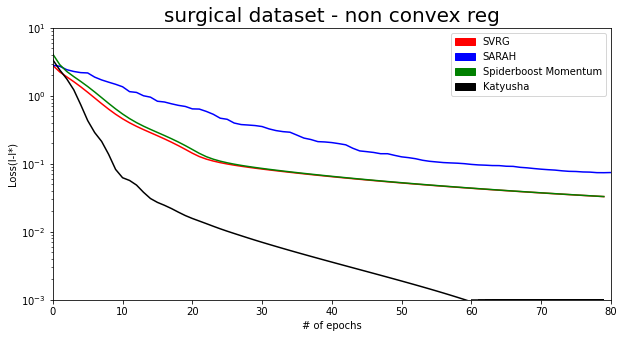

In [9]:
plot_loss_log_scale([star_loss_list_svrg_nc,star_loss_list_sarah_nc, star_loss_list_spiderboost_nc_mom, star_loss_list_katyusha_nc], ["SVRG","SARAH", "Spiderboost Momentum","Katyusha"], title_first_experiment, x_lim = [0,80] , y_lim=[1e-3, 1e1])

## EXPERIMENT 2 - l1 regularization

In [10]:
# Define common parameters for comparing algorithms
#experiment_2_stepsize = 0.01
eta = experiment_2_stepsize # Stepsize 
b = 256 # int(np.ceil(np.sqrt(X_train.shape[0]))) # Mini batch size
q = int(2*X_train.shape[0]/b) # Epoch length

L = 1/(3*eta) # Estimated lipschitz constant from stepsize
S = 80 # Number of epochs
gamma = 0.1 # Regularization parameter

w_start = np.random.randn(X_train.shape[1])

In [11]:
# SVRG training baseline

# Initialize w0
w0 = w_start.copy()

# Method

gradient = lambda X,y,w: gradient_rr_l1(X,y,w,gamma)
w_list_svrg = svrg(X_train, y_train, w0, S, q, eta, b, gradient)
loss_list_svrg_l1 = [loss_rr_l1(X_train,y_train,w,gamma=gamma) for w in w_list_svrg]

In [12]:
# SARAH training

# Initialize w0
w0 = w_start.copy()

# SARAH method with l1 optimization
gradient = lambda X,y,w: gradient_rr_l1(X,y,w,gamma)
w_list = sarah(X_train, y_train, w0, S, q, eta, b,gradient)
loss_list_sarah_l1 = [loss_rr_l1(X_train, y_train, w, gamma=gamma) for w in w_list]

In [13]:
# Spiderboost training

# Initialize w0 
w0 = w_start.copy()

# Method with l1 optimization
gradient = lambda X,y,w: gradient_rr_l1(X,y,w,gamma)
w_list = spiderboost(X_train, y_train, w0, eta, q, S*q, b, gradient, momentum = True, beta = 1)
loss_list_spiderboost_l1_mom = [loss_rr_l1(X_train,y_train,w,gamma=gamma) for w in w_list]

Done!                     


In [14]:
# Katyusha training

eta = experiment_2_stepsize_proximal
L = 1/(3*eta)

w0 = w_start.copy()

# Method with l1 optimization

prox_minimizer = lambda zk,grad,alpha: proximal_minimizer_rr_l1(zk,grad,alpha,gamma)
w_list = katyusha_minibatch(X_train,y_train,gradient_rr,prox_minimizer,w0,S,L,b,option = 1, t2 = 0.5)
loss_list_katyusha_l1_prox = [loss_rr_l1(X_train,y_train,w,gamma=gamma) for w in w_list]

In [15]:
# Make losses comparable

lstar = min([min(loss_list_svrg_l1), min(loss_list_sarah_l1), min(loss_list_spiderboost_l1_mom),
min(loss_list_katyusha_l1_prox)])

star_loss_list_svrg_l1 = [l-lstar for l in loss_list_svrg_l1]
star_loss_list_sarah_l1 = [l-lstar for l in loss_list_sarah_l1]
star_loss_list_spiderboost_l1_mom = [l-lstar for l in loss_list_spiderboost_l1_mom]
star_loss_list_katyusha_l1_prox = [l-lstar for l in loss_list_katyusha_l1_prox]

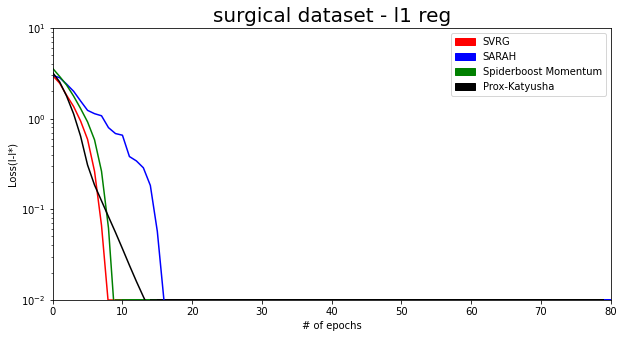

In [16]:
plot_loss_log_scale([star_loss_list_svrg_l1,star_loss_list_sarah_l1, star_loss_list_spiderboost_l1_mom, star_loss_list_katyusha_l1_prox], ["SVRG","SARAH", "Spiderboost Momentum","Prox-Katyusha"], title_second_experiment, x_lim = [0,80] , y_lim=[1e-2, 1e1])

## EXPERIMENT 3 - Robust regression no regularization

In [17]:
# Define common parameters for comparing algorithms
eta = experiment_3_stepsize # Stepsize 
b = 256 # int(np.ceil(np.sqrt(X_train.shape[0]))) # Mini batch size
q = int(2*X_train.shape[0]/b) # Epoch length

L = 1/(3*eta) # Estimated lipschitz constant from stepsize
S = 80 # Number of epochs

w_start = np.random.randn(X_train.shape[1])

In [18]:
# SVRG training baseline

# Initialize w0
w0 = w_start.copy()

# Method

gradient = lambda X,y,w: gradient_rr(X,y,w)
w_list_svrg = svrg(X_train, y_train, w0, S, q, eta, b, gradient)
loss_list_svrg_l1 = [loss_rr(X_train,y_train,w) for w in w_list_svrg]

In [19]:
# SARAH training

# Initialize w0
w0 = w_start.copy()

# SARAH method with l1 optimization
gradient = lambda X,y,w: gradient_rr(X,y,w)
w_list = sarah(X_train, y_train, w0, S, q, eta, b,gradient)
loss_list_sarah_l1 = [loss_rr(X_train,y_train,w) for w in w_list]

In [20]:
# Spiderboost training

# Initialize w0 
w0 = w_start.copy()

# Method with l1 optimization
gradient = lambda X,y,w: gradient_rr(X,y,w)
w_list = spiderboost(X_train, y_train, w0, eta, q, S*q, b, gradient, momentum = True, beta = 1)
loss_list_spiderboost_l1_mom = [loss_rr(X_train,y_train,w) for w in w_list]

Done!                     


In [21]:
# Katyusha training

eta = experiment_3_stepsize
L = 1/(3*eta)

w0 = w_start.copy()

# Method

gradient = lambda X,y,w: gradient_rr(X,y,w)
w_list = katyusha_minibatch_noprox(X_train,y_train,gradient,w0,S,L,b,option = 1, t2 = 0.5)
loss_list_katyusha_l1_prox = [loss_rr(X_train,y_train,w) for w in w_list]

In [22]:
# Make losses comparable

lstar = min([min(loss_list_svrg_l1), min(loss_list_sarah_l1), min(loss_list_spiderboost_l1_mom),
min(loss_list_katyusha_l1_prox)])

star_loss_list_svrg_l1 = [l-lstar for l in loss_list_svrg_l1]
star_loss_list_sarah_l1 = [l-lstar for l in loss_list_sarah_l1]
star_loss_list_spiderboost_l1_mom = [l-lstar for l in loss_list_spiderboost_l1_mom]
star_loss_list_katyusha_l1_prox = [l-lstar for l in loss_list_katyusha_l1_prox]

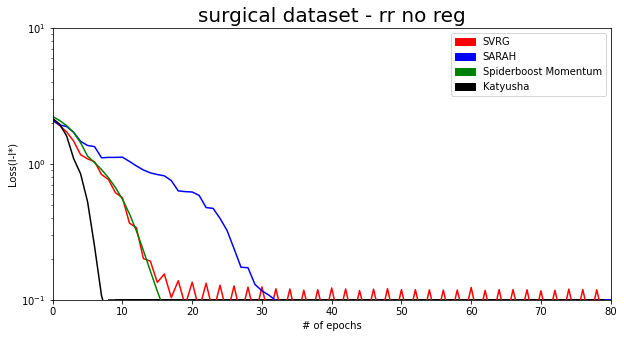

In [23]:
plot_loss_log_scale([star_loss_list_svrg_l1,star_loss_list_sarah_l1, star_loss_list_spiderboost_l1_mom, star_loss_list_katyusha_l1_prox], ["SVRG","SARAH", "Spiderboost Momentum","Katyusha"], title_third_experiment, x_lim = [0,80] , y_lim=[1e-1, 1e1])